# Рекомендательные системы

— программы, которые пытаются предсказать, какие объекты (фильмы, музыка, книги, новости, веб-сайты) будут интересны пользователю, имея определенную информацию о его профиле. Рекомендательные технологии способны формировать персонализированные рекомендации, основываясь на анализе предпочтений, поведения и интересов пользователей.

Типы:
* на экспертных знаниях (knowledge-based)
* на основе содержания (content-based)
* коллаборативная фильтрация:
  * user-based
  * item-based

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [32]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [3]:
movies=pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
genres=[]
for genre in movies.genres:
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)
genres

"['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary', 'Western', 'Film-Noir', '(no genres listed)']"

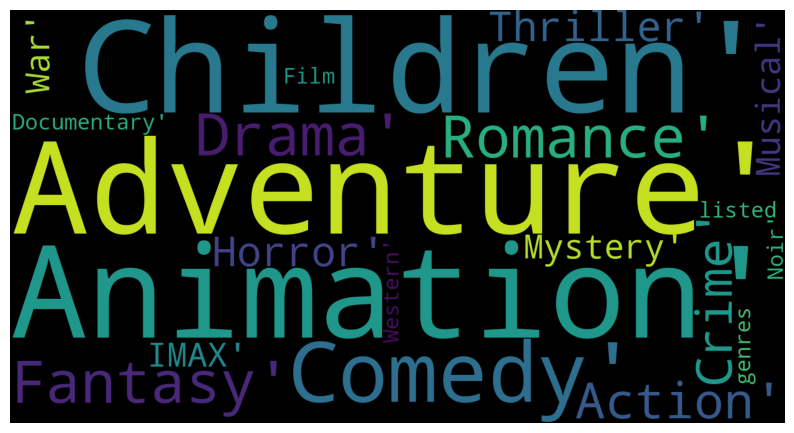

In [33]:
#WORDCLOUD for Movies Genre
from wordcloud import WordCloud

wordcloud_genre = WordCloud(width=1500, height=800, background_color='blacK',
                            min_font_size=2, min_word_length=4).generate(genres)

plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(wordcloud_genre)

<Axes: xlabel='rating', ylabel='Count'>

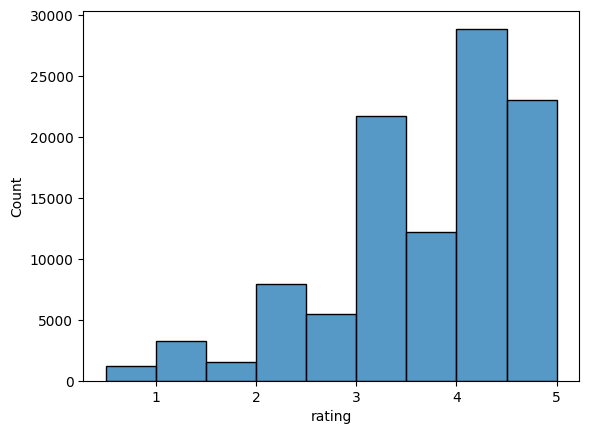

In [6]:
sns.histplot(ratings['rating'], binwidth=0.5)

In [7]:
df=pd.merge(ratings,movies, how='left', on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [8]:
df1=df.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(10,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


<BarContainer object of 10 artists>

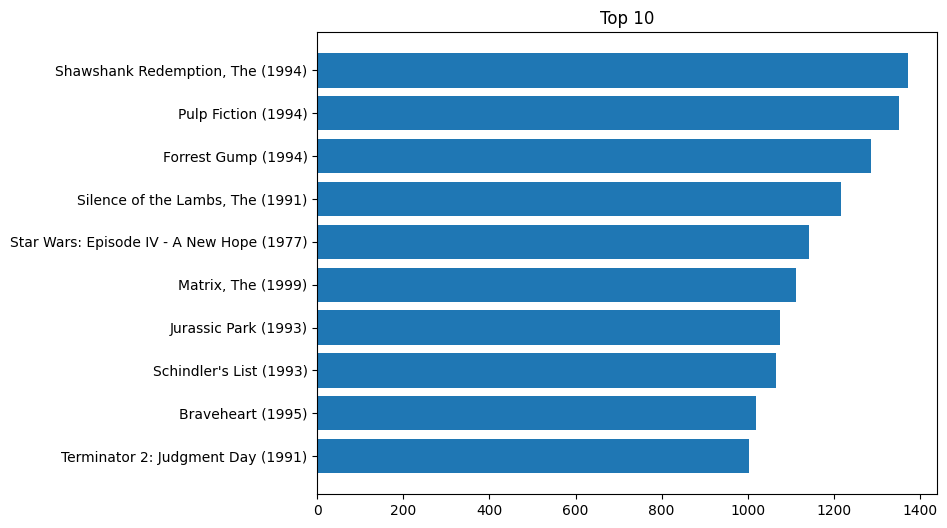

In [9]:
plt.figure(figsize=(8,6))
plt.title('Top 10')
#plt.xticks(rotation=90)
plt.barh(high_rated.index[::-1], high_rated['rating'][::-1])

## Подход Item-Based

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

TF-IDF вычисляет важность каждого слова в тексте относительно количества его употреблений в данном документе и во всей коллекции текстов. Этот метод позволяет выделить ключевые слова и понять, какие слова имеют больший вес для определенного текста в контексте всей коллекции.

In [11]:
movies[:20]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [12]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])

In [13]:
print(tfidf_matrix.toarray())

[[0.         0.40410292 0.53921623 ... 0.         0.         0.        ]
 [0.         0.50527236 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [14]:
matrix = pd.DataFrame(data = tfidf_matrix.toarray(),
                          columns = cv.get_feature_names_out())
matrix

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,...,listed,musical,mystery,no,noir,romance,sci,thriller,war,western
0,0.0,0.404103,0.539216,0.501506,0.263837,0.0,0.0,0.00000,0.474161,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.505272,0.000000,0.627061,0.000000,0.0,0.0,0.00000,0.592869,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.602350,0.0,0.0,0.00000,0.000000,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.798232,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.541389,0.0,0.0,0.43837,0.000000,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.717446,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.00000,0.000000,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10324,0.0,0.000000,0.689338,0.641130,0.337291,0.0,0.0,0.00000,0.000000,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
10325,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.00000,0.000000,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
10326,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.00000,0.000000,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
10327,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.00000,0.000000,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0


In [15]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix) #cosine_similarities(tfidf_matrix, tfidf_matrix)

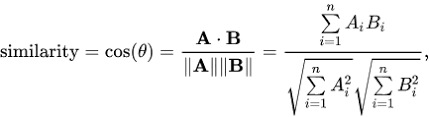

In [16]:
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']

In [17]:
def movie_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [18]:
movie_recommendations('Heat (1995)')

,title
22,Assassins (1995)
141,Die Hard: With a Vengeance (1995)
160,"Net, The (1995)"
253,Natural Born Killers (1994)
425,Judgment Night (1993)
524,Batman (1989)
843,Die Hard (1988)
1383,Hard Rain (1998)
1393,"Replacement Killers, The (1998)"
1405,U.S. Marshals (1998)


In [19]:
movie_recommendations('Toy Story (1995)')

,title
1815,Antz (1998)
2496,Toy Story 2 (1999)
2967,"Adventures of Rocky and Bullwinkle, The (2000)"
3166,"Emperor's New Groove, The (2000)"
3811,"Monsters, Inc. (2001)"
6617,DuckTales: The Movie - Treasure of the Lost La...
6997,"Wild, The (2006)"
7382,Shrek the Third (2007)
7987,"Tale of Despereaux, The (2008)"
9215,Asterix and the Vikings (Astérix et les Viking...


## Подход User-Based

In [20]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [21]:
!pip install scikit-surprise

In [23]:
from surprise.reader import Reader
from surprise.dataset import Dataset

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [26]:
from surprise import KNNBasic
from surprise.model_selection import cross_validate

KNN = KNNBasic()
cross_validate(KNN, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9535  0.9484  0.9566  0.9477  0.9617  0.9536  0.0052  
MAE (testset)     0.7344  0.7329  0.7347  0.7312  0.7408  0.7348  0.0032  
Fit time          0.15    0.21    0.18    0.18    0.25    0.20    0.03    
Test time         1.56    1.40    1.37    1.46    1.92    1.54    0.20    


{'test_rmse': array([0.95348099, 0.94837233, 0.95660303, 0.94765773, 0.96166641]),
 'test_mae': array([0.73436599, 0.73292271, 0.73472422, 0.73117895, 0.74079208]),
 'fit_time': (0.15407752990722656,
  0.21451568603515625,
  0.18196582794189453,
  0.17818570137023926,
  0.24934744834899902),
 'test_time': (1.5557465553283691,
  1.4017832279205322,
  1.3685722351074219,
  1.4598262310028076,
  1.9207310676574707)}

In [27]:
trainset = data.build_full_trainset()
KNN.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [34]:
KNN.predict(1, 12)

Prediction(uid=1, iid=12, r_ui=None, est=2.875556279508369, details={'actual_k': 20, 'was_impossible': False})